In [2]:
!sudo apt-get install -y xvfb ffmpeg x11-utils
!pip install -q 'gym==0.17.0'
!pip install -q 'imageio==2.4.0'
!pip install -q PILLOW
!pip install -q 'pyglet==1.5.0'
!pip install -q pyvirtualdisplay
!pip install -q tf-agents

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
xvfb is already the newest version (2:1.19.6-1ubuntu4.7).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


In [3]:
import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay
 
 #for tensorflow agents
import tensorflow as tf
 
from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import q_network
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common

In [4]:
# Set up a virtual display for rendering OpenAI gym environments.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

In [5]:
env_name = 'MountainCar-v0'
envy = suite_gym.load(env_name)

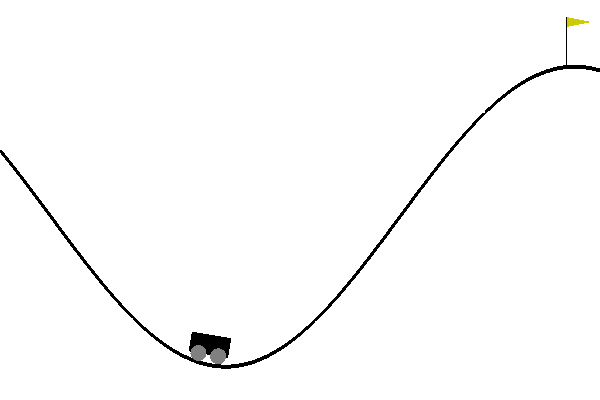

In [6]:
envy.reset()
PIL.Image.fromarray(envy.render())


*Code snippets for video rendering obtained from https://colab.research.google.com/drive/1flu31ulJlgiRL1dnN2ir8wGh9p7Zij2t#scrollTo=dGEFMfDOzLen*

In [7]:
#for atari games
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (50.3.2)


In [8]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
 
from IPython import display as ipythondisplay

In [9]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""
 
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    
 
def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [10]:
# gym environment query function gotten from "https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_12_01_ai_gym.ipynb"
def query_environment(name):
  env = gym.make(name)
  spec = gym.spec(name)
  print(f"Action Space: {env.action_space}")
  print(f"Observation Space: {env.observation_space}")
  print(f"Max Episode Steps: {spec.max_episode_steps}")
  print(f"Nondeterministic: {spec.nondeterministic}")
  print(f"Reward Range: {env.reward_range}")
  print(f"Reward Threshold: {spec.reward_threshold}")

In [21]:
query_environment('MountainCar-v0')

Action Space: Discrete(3)
Observation Space: Box(2,)
Max Episode Steps: 200
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: -110.0


In [22]:
env = wrap_env(gym.make("MountainCar-v0"))

In [23]:
discrete_size = [20] * len(env.observation_space.high)
discrete_size

[20, 20]

In [24]:
def discreter(state):
  discrete_state = (state - env.observation_space.low)/discrete_size
  return tuple(discrete_state.astype(np.int))

In [25]:
num_episodes = 25000
learning_rate = 0.1
discount_rate = 0.97
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

In [26]:
q_table = np.random.uniform(low=-2,high=0,size=(20,20,3))

In [27]:
for episode in range(num_episodes):
  state = discreter(env.reset())
  done = False

  env.render()
  while done == False:
    exploration_rate_threshold = random.uniform(0,1)

    if exploration_rate_threshold > exploration_rate:
      action = np.argmax(q_table[state])
    else:
      action = env.action_space.sample()

    new_state,reward,done,info = env.step(action)

    new_discrete_state = discreter(new_state)
 
    q_table[state + (action,)] = q_table[state + (action,)] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_discrete_state]))

    state = new_discrete_state 

  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)  

env.close()

In [28]:
show_video()